In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
cf.go_offline()
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles

# Introduction

This EDA is mainly trying to understand the data provided by the competition. To understand what's the competition about, please check the overview of the competition ("https://www.kaggle.com/c/google-quest-challenge/overview/description"). 

### Task
Given that the main inputs are `question_title`, `question_body` and `answer`, we are required to predict the understanding of these inputs in terms of values between 0 - 1. 

Note: **Labels are not binary but continuos values**

#### Inputs:
1. question_title
2. question_body
3. answers
4. Features etc...

#### Outputs (30 Labels):
1. question_asker_intent_understanding
2. question_body_critical
3. question_conversational
4. question_expect_short_answer
5. question_fact_seeking
6. question_has_commonly_accepted_answer
7. question_interestingness_others
8. question_interestingness_self
9. question_multi_intent
10. question_not_really_a_question
11. question_opinion_seeking
12. question_type_choice
13. question_type_compare
14. question_type_consequence
15. question_type_definition
16. question_type_entity
17. question_type_instructions
18. question_type_procedure
19. question_type_reason_explanation
20. question_type_spelling
21. question_well_written
22. answer_helpful
23. answer_level_of_information
24. answer_plausible
25. answer_relevance
26. answer_satisfaction
27. answer_type_instructions
28. answer_type_procedure
29. answer_type_reason_explanation
30. answer_well_written

In [122]:
df_train = pd.read_csv('/Users/Me/Downloads/datasets-master/train.csv')

# Preview of the dataset

In [3]:
df_train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


## Features columns can be obtained from

In [29]:
df_train.columns[1:10].tolist()

['question_title',
 'question_body',
 'question_user_name',
 'question_user_page',
 'answer',
 'answer_user_name',
 'answer_user_page',
 'url',
 'category']

## Target Columns (Question Undestanding)

In [123]:
question_cols = df_train.columns[11:32].tolist()
question_cols

['question_asker_intent_understanding',
 'question_body_critical',
 'question_conversational',
 'question_expect_short_answer',
 'question_fact_seeking',
 'question_has_commonly_accepted_answer',
 'question_interestingness_others',
 'question_interestingness_self',
 'question_multi_intent',
 'question_not_really_a_question',
 'question_opinion_seeking',
 'question_type_choice',
 'question_type_compare',
 'question_type_consequence',
 'question_type_definition',
 'question_type_entity',
 'question_type_instructions',
 'question_type_procedure',
 'question_type_reason_explanation',
 'question_type_spelling',
 'question_well_written']

## Target Columns (Answer Understanding)

In [124]:
answer_cols = df_train.columns[32:].tolist()
answer_cols

['answer_helpful',
 'answer_level_of_information',
 'answer_plausible',
 'answer_relevance',
 'answer_satisfaction',
 'answer_type_instructions',
 'answer_type_procedure',
 'answer_type_reason_explanation',
 'answer_well_written']

# Question Title

We are curious to see whether the dataset contains any duplicated unique question title. Turns out the there are alot of them were duplicates.

In [33]:
df_train.question_title.value_counts().nlargest(10)

What is the best introductory Bayesian statistics textbook?                        12
Important non-technical course for programmers?                                    11
What does mathematics have to do with programming?                                 11
How to prevent the "Too awesome to use" syndrome                                    9
Another instructor is pushing me out of the classroom right after my class ends     7
No sound in Ubuntu except at log in                                                 7
How do I deal with a slow and undedicated colleague in the team?                    7
What are the benefits of owning a physical book?                                    7
Good travel games for two players, especially for playing on trains?                6
When should a supervisor be a co-author?                                            6
Name: question_title, dtype: int64

In [35]:
sum(df_train.question_title.value_counts() > 1)

1838

In [38]:
sum(df_train.question_title.value_counts() > 1)/len(df_train.question_title.unique())

0.512977951437343

Around 51% of the questions were duplicates. The next thing we are interested would be is there any duplicate questions with same user? The goal of this investigation is to see whether certain question asked by the same user has the same score on the target labels.

In [44]:
df_train[df_train[['question_title', 'question_user_name']].duplicated()]

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
102,168,Why is the potential function defined differen...,I am very familiar with the concept of a poten...,Radon Rosborough,https://math.stackexchange.com/users/160658,After reading further on in my calculus textbo...,Radon Rosborough,https://math.stackexchange.com/users/160658,http://math.stackexchange.com/questions/133557...,SCIENCE,...,0.888889,1.000000,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,1.000000,1.000000
159,250,Directory.GetFiles string gives an error,I am creating a website using asp.net and c#\n...,LIH,https://stackoverflow.com/users/2436770,"A little advice, when using the file system in...",Mike Perrenoud,https://stackoverflow.com/users/1195080,http://stackoverflow.com/questions/18471710/di...,STACKOVERFLOW,...,1.000000,1.000000,0.777778,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,1.000000
186,294,When should a supervisor be a co-author?,What are people's views on this? To be specif...,MrB,https://mathoverflow.net/users/2189,"First of all, this question must be decided by...",Alexandre Eremenko,https://mathoverflow.net/users/25510,http://mathoverflow.net/questions/57337,SCIENCE,...,0.555556,1.000000,0.666667,1.000000,0.833333,0.700000,0.333333,0.000000,1.000000,0.666667
240,385,Why do I have to explicitly add perl before th...,When i run my script like so: \n\nC:\>perl scr...,Alex,https://stackoverflow.com/users/8676,When you invoke your code as perl script.pl -f...,Ether,https://stackoverflow.com/users/40468,http://stackoverflow.com/questions/4065054/why...,STACKOVERFLOW,...,0.888889,1.000000,0.666667,1.000000,1.000000,0.933333,0.333333,0.000000,0.666667,0.888889
271,437,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,You can try this:\n\n1 - change the image mode...,Luciano,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,0.888889,0.666667,1.000000,1.000000,0.800000,1.000000,0.000000,0.333333,1.000000
287,463,Does this C++ static analysis rule make sense ...,I'm implementing some C++ static analysis rule...,Stuart Golodetz,https://stackoverflow.com/users/499449,"As you say, #1 and #3 are fine (though #1 is a...",ecatmur,https://stackoverflow.com/users/567292,http://stackoverflow.com/questions/11538478/do...,STACKOVERFLOW,...,0.888889,1.000000,0.666667,1.000000,1.000000,0.866667,0.333333,0.000000,0.666667,0.888889
292,469,How do I deal with a compromised server?,I suspect that one or more of my servers is co...,Lucas Kauffman,https://security.stackexchange.com/users/3339,"Making a file ""undeletable"" in Linux is done w...",Tom Leek,https://security.stackexchange.com/users/5411,http://security.stackexchange.com/questions/39...,TECHNOLOGY,...,0.888889,1.000000,0.666667,1.000000,0.888889,0.666667,1.000000,0.000000,0.000000,0.888889
296,477,What are the benefits of owning a physical book?,I have seen this question about updates of the...,András,https://rpg.stackexchange.com/users/9552,"I own an ebook, and I find it more comfortable...",Flamma,https://rpg.stackexchange.com/users/5641,http://rpg.stackexchange.com/questions/34615/w...,CULTURE,...,1.000000,0.888889,0.666667,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
298,480,How should I design a table with nested catego...,I am really confused with user interface desig...,user2082226,https://ux.stackexchange.com/users/27595,"From your description, I've taken the liberty ...",Benny Skogberg,https://ux.stackexchange.com/users/4679,http://ux.stackexchange.com/questions/35391/ho...,TECHNOLOGY,...,0.444444,1.000

In [47]:
df_train.loc[df_train.question_user_name == 'Radon Rosborough'].iloc[:, 11:32]

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written
27,1.000000,0.777778,0.0,1.0,1.0,1.0,0.666667,0.444444,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.888889
102,0.888889,0.777778,0.0,0.0,1.0,1.0,0.666667,0.444444,0.333333,0.0,...,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.888889


Same question title by same user would have same question body. That's proven by the below example. However, the scores for question labels were not the same.

In [49]:
df_train.loc[df_train.question_user_name == 'Radon Rosborough'].question_body.tolist()

['I am very familiar with the concept of a potential function, and potential energy, from calculus-based physics.\n\nFor instance, if we have the familiar force field $\\mathbf{F} = -mg \\,\\mathbf{j}$, then a potential function is given by $U = mgy + C$. (Since potential energy is relative, we have an infinite number of potential functions.)\n\nNotice that the gradient of the potential function is the negative of the force field: $$\\nabla U = \\nabla(mgy + C) = mg \\,\\mathbf{j} = -\\mathbf{F}.$$\n\nThat was perfectly fine with me. But now in vector calculus, I am reading that the potential function $f$ of a vector function $\\mathbf{F}$ is such that $\\nabla f = \\mathbf{F}$. A negative sign appears to have been lost when migrating from physics to calculus.\n\nIt seems confusing to call $f$ a "potential function", since it cannot be interpreted as potential energy in the real world. So why is the calculus nomenclature as it is (i.e., why not call this something else and then say the

In [74]:
same_q_u = df_train.loc[df_train.question_user_name == 'Radon Rosborough'].iloc[:, 11:32]

The below graph shows that some of the questions understanding score were not exactly the same. **The reason for this could possibly be that different evaluators provide different scores.** This will also exists in question body and answer as well.

In [111]:
same_q_u.T.iplot(kind='bar')

Question Title's Length

In [185]:
df_train['title_len'] = df_train.question_title.map(len)

In [187]:
df_train.title_len.describe()

count    6079.000000
mean       53.310248
std        20.205065
min        15.000000
25%        39.000000
50%        50.000000
75%        65.000000
max       147.000000
Name: title_len, dtype: float64

In [194]:
df_train.title_len.iplot(kind='histogram', xTitle='title length', yTitle='counts')

# Question Body

In this section, we would like to have a brief understanding what's inside the question body. To make it easy, we would look one example from each category to have a brief understanding of what's inside the question body.

#### 3 Question Body from StackOverFlow

In [171]:
df_train.loc[df_train.category=='STACKOVERFLOW'].question_body.tolist()[:3]

["I am creating an HTML table with jQuery's DataTables plug-in. I would like to know if there is a way to group a number of columns together with a Title which describes what the grouping represents. \n\nIn my specific case, 3 of my columns will display an address (Street, City, State). I'd like them to have an additional border around just those columns with a title that indicates to the end-user that those 3 columns represent the address.\n\nI'm considering just changing the background color of those 3 columns which will do the job but I'm wanting the Address title to be displayed. I've seen that rows can be grouped together and sections divided by separators; however, I haven't yet come across anything that makes it possible to group columns together.\n",
 'I am new to C# and am having a particularly difficult time figuring out how test assemblies work. This is my Solution directory (with a single project MyProject inside of it):\n\nMySolution/MySolutionFile.sln     -- My Solution F

This is the first 3 question from stackoverflow. It's obvious that the question contains some really specific keywords related to the field and also codes with lots of new lines ('\n'). This shows that you have lots of preprocessing work to do in order to clean the text above.

#### 3 Question Body From LIFE ARTS

In [172]:
df_train.loc[df_train.category=='LIFE_ARTS'].question_body.tolist()[:3]

['After playing around with macro photography on-the-cheap (read: reversed lens, rev. lens mounted on a straight lens, passive extension tubes), I would like to get further with this. The problems with the techniques I used is that focus is manual and aperture control is problematic at best. This limited my setup to still subjects (read: dead insects) Now, as spring is approaching, I want to be able to shoot live insects. I believe that for this, autofocus and settable aperture will be of great help.\n\nSo, one obvious but expensive option is a macro lens (say, EF 100mm Macro) However, I am not really interested in yet another prime lens. An alternative is the electrical extension tubes.\n\nExcept for maximum focusing distance, what am I losing when using tubes (coupled with a fine lens, say EF70-200/2.8) instead of a macro lens?\n',
 "I am trying to make a binary image. I want more than just the look of the image to be black/white, but I want the actual file to be a binary file. Every

#### 3 Question Body From SCIENCE

In [173]:
df_train.loc[df_train.category=='SCIENCE'].question_body.tolist()[:3]

['I\'m working on a PCB that has through-hole components on both sides of the board. The "top" side of the board is mounted flush to a Delrin plastic block (the only top-side component is a gas sensor that is fed air samples through hose fittings in the plastic block).\n\nThe flush mounting means that I have to add grooves to the plastic block to accommodate the soldered pins of the bottom-side components. Assuming a standard 0.062" thickness FR4 board, how deep do I need to make the grooves in the plastic block? The only thing I could find is this NASA workmanship standard that states 0.5mm to 2.29mm, but I\'m not sure if that will always hold true.\n',
 'I am asking this question completely out of curiosity. The other day, my roommate, by mistake, used \'Light year\' as a unit of time instead of distance. When I corrected him (pedantic, much), he said the following:\n\n"Units are relative. And according to Fourier Transforms, units can be changed so Light year is a unit of time."\n\n

As for `SCIENCE` and `LIFE_ARTS` category, we can see there are lots of specific keywords that's really uncommon and also metrics such as `0.5mm` or even `$10`

# Host

In [7]:
from urllib.parse import urlparse
from sklearn.preprocessing import OneHotEncoder
import re
find = re.compile(r"^[^.]*")

df_train['netloc'] = df_train['url'].apply(lambda x: re.findall(find, urlparse(x).netloc)[0])


In [150]:
df_train.netloc.value_counts(normalize=True).iplot(kind='bar')

# Category

In [8]:
df_train.columns[:11]

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host'],
      dtype='object')

In [10]:
df_train.answer_user_name.value_counts().describe()

count    4114.000000
mean        1.477637
std         1.319074
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        20.000000
Name: answer_user_name, dtype: float64

In [11]:
df_train.answer_user_name.value_counts().nlargest(10)

Scott             20
egreg             18
Marius            16
Alex              16
Andy aka          14
Pᴀᴜʟsᴛᴇʀ2         12
Gilles            11
Spehro Pefhany    11
Mark              11
AndreJ            10
Name: answer_user_name, dtype: int64

- 75% of the users answer 1 question. 
- However, Among the top 10 users answer the most questions, 90% of them doesn't have numbers in their name. 

In [16]:
df_train.answer_user_name.value_counts().nlargest(10).iplot(kind='bar')

In [18]:
df_train.category.value_counts().iplot(kind='bar')

In [179]:
df_train.groupby('category')['answer_helpful',
 'answer_level_of_information',
 'answer_plausible',
 'answer_relevance',
 'answer_satisfaction',
 'answer_type_instructions',
 'answer_type_procedure',
 'answer_type_reason_explanation',
 'answer_well_written'].mean().iplot(kind='line')


according to the line plot above, we can see that the mean for `answer_type_procedure` and `answer_type_instructions` are quite low. This means that most of the values in these two columns are usually `0.0`

### Target Labels For Question Part 1

In [178]:
df_train.groupby('category')[
 'question_asker_intent_understanding',
 'question_body_critical',
 'question_conversational',
 'question_expect_short_answer',
 'question_fact_seeking',
 'question_has_commonly_accepted_answer',
 'question_interestingness_others',
 'question_interestingness_self',
 'question_multi_intent',
'question_not_really_a_question',
'question_opinion_seeking'
].mean().iplot(kind='line')

Interestingly, for questions labels we can see that `question_not_really_a_question` and `question_conversational` have mean value below 0.2. This shows that most values in these two columns are `0.0`. 

### Target Labels For Question Part 2

In [180]:
df_train.groupby('category')[
 'question_type_choice',
 'question_type_compare',
 'question_type_consequence',
 'question_type_definition',
 'question_type_entity',
 'question_type_instructions',
 'question_type_procedure',
 'question_type_reason_explanation',
 'question_type_spelling',
    'question_well_written'
].mean().iplot(kind='line')

In [111]:
mean_less_than_one = ['question_conversational',
'question_not_really_a_question',
'question_type_compare',
'question_type_consequence',
'question_type_definition',
'question_type_entity',
'question_type_spelling']

In [117]:
for a in mean_less_than_one:
    print(a.upper() + ": \n", sorted(df_train[a].unique()))

QUESTION_CONVERSATIONAL: 
 [0.0, 0.3333333333333333, 0.5, 0.6666666666666666, 1.0]
QUESTION_NOT_REALLY_A_QUESTION: 
 [0.0, 0.3333333333333333, 0.5, 0.6666666666666666, 1.0]
QUESTION_TYPE_COMPARE: 
 [0.0, 0.3333333333333333, 0.5, 0.6666666666666666, 1.0]
QUESTION_TYPE_CONSEQUENCE: 
 [0.0, 0.3333333333333333, 0.5, 0.6666666666666666, 1.0]
QUESTION_TYPE_DEFINITION: 
 [0.0, 0.3333333333333333, 0.5, 0.6666666666666666, 1.0]
QUESTION_TYPE_ENTITY: 
 [0.0, 0.3333333333333333, 0.5, 0.6666666666666666, 1.0]
QUESTION_TYPE_SPELLING: 
 [0.0, 0.3333333333333333, 0.6666666666666666]


In [121]:
unique_target_values = []

In [97]:
df_train[target_cols[1]].unique().tolist()

[0.3333333333333333,
 1.0,
 0.6666666666666666,
 0.7777777777777778,
 0.4444444444444444,
 0.5555555555555556,
 0.8888888888888888,
 0.5,
 0.8333333333333334]

In [122]:
for a in range(0, len(target_cols)):
    unique_target_values.append(df_train[target_cols[a]].unique())

In [125]:
flatten = lambda l: [item for sublist in l for item in sublist]

# Total unique values for all target

In [127]:
set(flatten(unique_target_values))

{0.0,
 0.2,
 0.26666666666666666,
 0.3,
 0.3333333333333333,
 0.33333333333333337,
 0.4,
 0.4444444444444444,
 0.4666666666666667,
 0.5,
 0.5333333333333333,
 0.5555555555555556,
 0.6,
 0.6666666666666666,
 0.6666666666666667,
 0.7,
 0.7333333333333333,
 0.7777777777777778,
 0.8,
 0.8333333333333334,
 0.8666666666666666,
 0.8888888888888888,
 0.9,
 0.9333333333333332,
 1.0}

It's weird that all values has kinda of a similar patterns. According to some comments in the competition, it was said that the values is average between 18 or 90 users so that's why the values are in this sort of range.

# WordCloud for each category

In [65]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [96]:
import matplotlib.gridspec as gridspec # to do the grid of plots

stopwords = set(STOPWORDS)
newStopWords = ['amp', 'gt', 'lt', 'div', 'id',
                'fi', 'will', 'use', 'one', 'nbsp', 'need', "n't"]
stopwords.update(newStopWords)

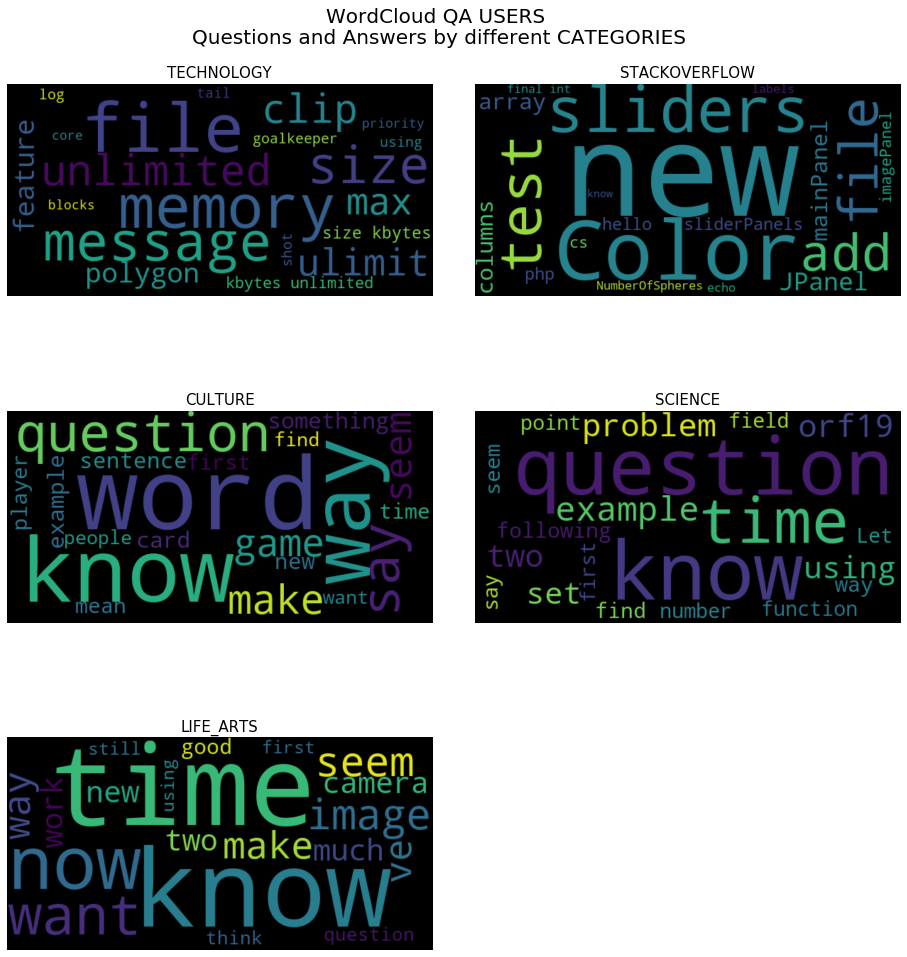

In [97]:
grid = gridspec.GridSpec(3, 2)
plt.figure(figsize=(16,16))
plt.suptitle('WordCloud QA USERS \nQuestions and Answers by different CATEGORIES', size=20)

for n, col in enumerate(df_train['category'].value_counts().index):
    ax = plt.subplot(grid[n])
    q_wordcloud = WordCloud(
    width = 600,
    height = 300,
    max_words=20,
    background_color = 'black',
    stopwords = stopwords).generate(str(df_train.loc[df_train.category == col].treated_question_body.values))
    plt.imshow(q_wordcloud, interpolation = 'bilinear')
    
    ax.set_title(str(col), fontsize=15)
    ax.set_xlabel('')
    plt.axis('off')
    
plt.subplots_adjust(top = 0.95, hspace=.1, wspace=.1 )
plt.show()

## Length of Inputs

In [141]:
df_train['qb_len'] = df_train['question_body'].map(len)

In [142]:
df_train['qa_len'] = df_train['answer'].map(len)

In [143]:
df_train['qt_len'] = df_train['question_title'].map(len)

In [144]:
df_train.groupby('category')['qt_len', 'qb_len', 'qa_len'].mean().iplot(title="Mean length for each category")

The reason perhaps `qb_len` for `STACKVOERFLOW` and `TECHNOLOGY` is larger compared to `ans_len` might be because the question body usually contains blocks of code that explains the problem.

# question_user_name same as answer_user_name

In [9]:
same_users = df_train.loc[df_train.question_user_name == df_train.answer_user_name]

In [10]:
same_users.category.value_counts()

TECHNOLOGY       84
STACKOVERFLOW    79
CULTURE          11
SCIENCE           8
LIFE_ARTS         6
Name: category, dtype: int64

In [102]:
len(set(df_train.question_user_name + df_train.answer_user_name))

6051

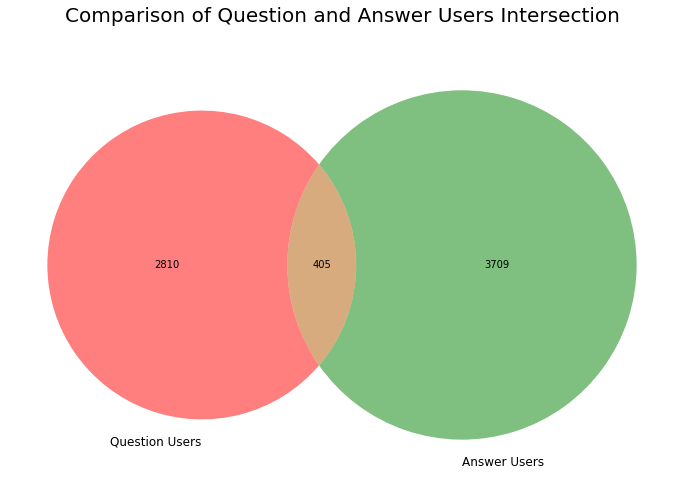

In [63]:
plt.figure(figsize=(12,8))

venn2([set(df_train['question_user_name'].value_counts(dropna=False).index), 
       set(df_train['answer_user_name'].value_counts(dropna=False).index)],
      set_labels=('Question Users', 'Answer Users'), alpha=.5)
plt.title('Comparison of Question and Answer Users Intersection\n', fontsize=20)

plt.show()

We can see that there are 6% of users that provides question and answers.

# HeatMap Features

In [125]:
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder
import re
find = re.compile(r"^[^.]*")

df_train['netloc'] = df_train['url'].apply(lambda x: re.findall(find, urlparse(x).netloc)[0])

In [126]:
le = LabelEncoder()
catloc_features = le.fit_transform(df_train['category'])
netloc_features = le.fit_transform(df_train['netloc'])
features_train = np.vstack([catloc_features, netloc_features]).T

In [145]:
heatmap_feat = df_train[question_cols + answer_cols + ['qt_len', 'qb_len', 'qa_len', 'category', 'netloc']].corr()

In [146]:
mask = np.zeros_like(heatmap_feat)

In [147]:
mask[np.triu_indices_from(mask)] = True

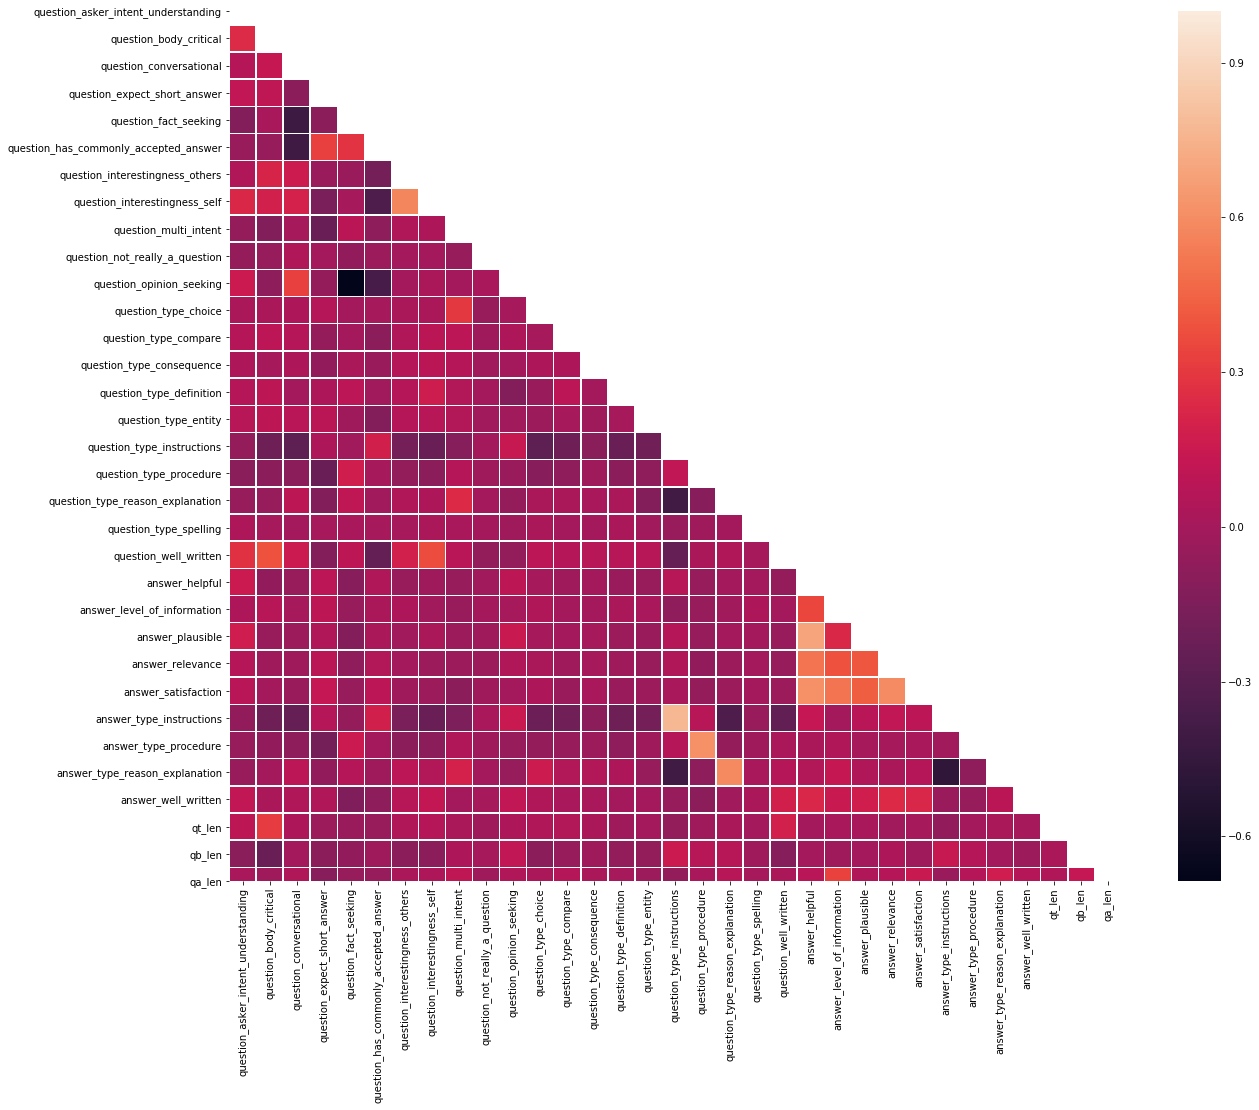

In [148]:
%matplotlib inline
plt.figure(figsize=(20,16))
sns.heatmap(heatmap_feat, mask=mask, linewidths=.5)
plt.show()

# Understanding Evaluation Metric

The spearman rank correlation metric mainly look at the correlation between two array's rank order. As you can see the result between array `a` and array `b`, the correlation is `1.0` as their ranks were the same. However for the result between array `a` and array `c`, the correlation is only 0.79 despite array `c` has two identical values from array `a`. **Thus, the predictions rank order has to be inline with the private test result's rank order.**

In [55]:
from scipy.stats import spearmanr

In [56]:
a = [1, 2, 3, 4]

b = [0.1, 0.2, 0.3, 0.4]

In [57]:
spearmanr(a,b)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [58]:
c = [0.1, 2, 0.3, 4]

In [59]:
spearmanr(a,c)

SpearmanrResult(correlation=0.7999999999999999, pvalue=0.20000000000000007)